In [1]:
import pandas as pd
import ast
from sklearn.preprocessing import StandardScaler

def read_and_preprocess(file_path):
    """
    Reads the CSV file (which has a timestamp and a list of features per row)
    and converts it into a DataFrame with separate columns for each feature,
    ignoring the timestamp.
    """
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            # Remove any extraneous whitespace
            s = line.strip()
            if not s:
                continue

            # Remove any prepended characters (e.g., line numbers) if present.
            if "|" in s:
                s = s.split("|", 1)[1].strip()

            # Split into timestamp and feature string using the first comma only.
            parts = s.split(",", 1)
            if len(parts) != 2:
                continue

            # Ignore the timestamp (parts[0]) and process only the feature list.
            feature_string = parts[1].strip()
            try:
                features = ast.literal_eval(feature_string)
            except Exception as e:
                print("Error parsing features from line:", s)
                continue

            # Append only the features, dropping the timestamp.
            data.append(features)

    if not data:
        return None

    # Create column names for features only.
    num_features = len(data[0])
    columns = [f'feat_{i}' for i in range(num_features)]
    df = pd.DataFrame(data, columns=columns)
    # Scale the data using StandardScaler
    scaler = StandardScaler()
    scaled_array = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(scaled_array, columns=columns)
    return df_scaled


In [2]:
green_spectrum_1 = pd.concat([
    read_and_preprocess("color_logs_1\\signal_green\\spectrum\\O1.csv"),
    read_and_preprocess("color_logs_1\\signal_green\\spectrum\\O2.csv")
], axis=1)

red_spectrum_1 = pd.concat([
    read_and_preprocess("color_logs_1\\signal_red\\spectrum\\O1.csv"),
    read_and_preprocess("color_logs_1\\signal_red\\spectrum\\O2.csv")
], axis=1)

violet_spectrum_1 = pd.concat([
    read_and_preprocess("color_logs_1\\signal_violet\\spectrum\\O1.csv"),
    read_and_preprocess("color_logs_1\\signal_violet\\spectrum\\O2.csv")
], axis=1)

print(violet_spectrum_1.head())


Error parsing features from line: timestamp,value
Error parsing features from line: timestamp,value
Error parsing features from line: timestamp,value
Error parsing features from line: timestamp,value
Error parsing features from line: timestamp,value
Error parsing features from line: timestamp,value
     feat_0    feat_1    feat_2    feat_3    feat_4    feat_5    feat_6  \
0  0.600781  0.532898 -0.602782 -0.371966  0.983865 -0.589066  0.360267   
1  0.641240  0.583599 -0.401763 -0.078037  0.797990 -0.456516  1.182528   
2  0.684890  0.638117 -0.189947  0.501022 -0.168079  0.929138 -0.097563   
3  0.730237  0.694165  0.044300  0.833547 -0.617456  1.075911 -0.635549   
4  0.775678  0.749686  0.290062  0.573722 -0.056147 -0.056981  1.542712   

     feat_7    feat_8    feat_9  ...  feat_194  feat_195  feat_196  feat_197  \
0  0.524181  1.505605 -1.097089  ... -0.998738 -1.781686 -2.152026  0.887946   
1 -0.304474 -0.008164  0.630768  ... -1.374470 -1.330960 -2.464858  0.791009   
2  0.5040

In [3]:
green_spectrum_1['label'] = 'green'
red_spectrum_1['label'] = 'red'
violet_spectrum_1['label'] = 'violet'

spectrum_1 = pd.concat([green_spectrum_1, red_spectrum_1, violet_spectrum_1])
print(spectrum_1.head())

     feat_0    feat_1    feat_2    feat_3    feat_4    feat_5    feat_6  \
0  1.725911  1.780315  1.408887  1.819774  0.680828 -0.105715  0.929413   
1  1.703700  1.751603  1.311217  1.916282 -0.529549  2.339642 -0.794216   
2  1.668088  1.710753  1.226046  1.583699  0.180674  1.348890 -0.200964   
3  1.619664  1.658944  1.150217  1.178270  1.772339 -1.226075  1.626331   
4  1.559046  1.596643  1.094244  1.243530  1.682300 -0.656622  0.838516   

     feat_7    feat_8    feat_9  ...  feat_195  feat_196  feat_197  feat_198  \
0  1.286575 -2.100530  2.730594  ...  1.432459  2.282761 -0.914006  0.202656   
1 -0.722540  2.835264 -2.644327  ...  1.548805  2.446777 -0.384037  0.339733   
2  0.992656 -1.505260  2.543428  ...  1.805529  2.154984  0.458467  0.398515   
3  0.334110  0.556995 -1.333335  ...  1.886473  1.710978  0.975899  0.653797   
4 -0.786960  1.167892  0.554104  ...  1.885826  1.223593  1.136424  0.876096   

   feat_199  feat_200  feat_201  feat_202  feat_203  label  
0  1.49

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [17]:
X = spectrum_1.drop(columns='label')
y = spectrum_1['label']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
model = LogisticRegression(class_weight="balanced", max_iter=5000)

model.fit(x_train, y_train)

predictions = model.predict(x_test)

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

       green       0.00      0.00      0.00        10
         red       0.00      0.00      0.00         9
      violet       0.14      0.09      0.11        11

    accuracy                           0.03        30
   macro avg       0.05      0.03      0.04        30
weighted avg       0.05      0.03      0.04        30



In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix using the true labels and predictions
cm = confusion_matrix(y_test, predictions, labels=model.classes_)

# Create a confusion matrix display and plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


NameError: name 'plt' is not defined

In [674]:
# test the model on another sample

blue_O1 = pd.read_csv("color_logs_ethan_test\\signal_blue\\signal\\O1.csv")
blue_O2 = pd.read_csv("color_logs_ethan_test\\signal_blue\\signal\\O2.csv")

red_O1 = pd.read_csv("color_logs_ethan_test\\signal_red\\signal\\O1.csv")
red_O2 = pd.read_csv("color_logs_ethan_test\\signal_red\\signal\\O2.csv")

green_O1 = pd.read_csv("color_logs_ethan_test\\signal_green\\signal\\O1.csv")
green_O2 = pd.read_csv("color_logs_ethan_test\\signal_green\\signal\\O2.csv")



blue_O1.drop(columns=["timestamp"], inplace=True)
blue_O2.drop(columns=["timestamp"], inplace=True)


red_O1.drop(columns=["timestamp"], inplace=True)
red_O2.drop(columns=["timestamp"], inplace=True)

green_O1.drop(columns=["timestamp"], inplace=True)
green_O2.drop(columns=["timestamp"], inplace=True)

C:\Users\er321\AppData\Local\Temp\ipykernel_26188\446333233.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Blue O1', 'Blue O2', 'Red O1', 'Red O2', 'Green O1', 'Green O2'])


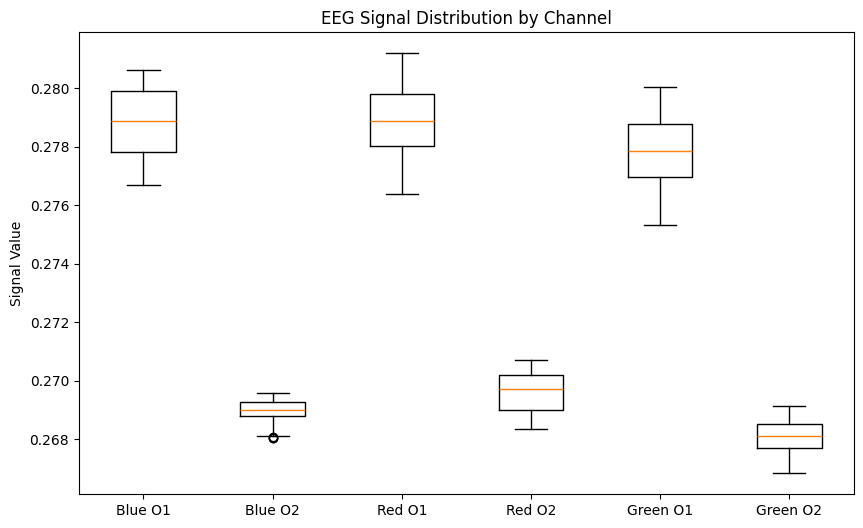

In [ ]:
# display boxplots for all channels
import matplotlib.pyplot as plt
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create boxplots for all channels
data = [blue_O1['value'], blue_O2['value'],
        red_O1['value'], red_O2['value'], 
        green_O1['value'], green_O2['value']]
plt.boxplot(data, labels=['Blue O1', 'Blue O2', 'Red O1', 'Red O2', 'Green O1', 'Green O2'])

# Customize the plot
plt.title('EEG Signal Distribution by Channel')
plt.ylabel('Signal Value')

# Display the plot
plt.show()


In [676]:
# from joblib import load

# import pandas as pd

# # Load the best model saved from the grid search
# best_model = load('best_model.joblib')

# mystery_O1 = pd.read_csv("color_logs\\signal_blue\\signal\\O1.csv")
# mystery_O2 = pd.read_csv("color_logs\\signal_blue\\signal\\O2.csv")
# mystery_T3 = pd.read_csv("color_logs\\signal_blue\\signal\\T3.csv")
# mystery_T4 = pd.read_csv("color_logs\\signal_blue\\signal\\T4.csv")

# example_df = pd.DataFrame({
#     "O1": mystery_O1["value"],
#     "O2": mystery_O2["value"],
#     "T3": mystery_T3["value"],
#     "T4": mystery_T4["value"]
# })

# # Extract the features (ensure the CSV has columns "O1" and "O2")
# X_example = example_df[['O1', 'O2', 'T3', 'T4']]

# # Use the loaded model to predict labels for the example data
# predictions = best_model.predict(X_example)

# # Attach the predictions to the DataFrame and display the count of predicted labels
# example_df['Predicted Label'] = predictions
# print("Count of predicted labels:")
# print(example_df['Predicted Label'].value_counts())

